In [10]:
import copy
import importlib
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import sys

sys.path.append(os.path.join(os.getenv("HOME"), "gpuaffman_networks/"))
from genetics import graph_crossover
import general_network_visualization

In [11]:
def plot_network_directed_cut(graph, subgraph, all_cut_wires, pos, ax):
    labels = {}
    node_colors = ["C1" if node in subgraph else "C0" for node in graph.nodes]
    edge_colors = []
    for edge in graph.edges(data=True, keys=True):
        if edge[0] in subgraph and edge[1] in subgraph:
            edge_colors.append("C1")
        elif edge in all_cut_wires:
            edge_colors.append("C2")
        else:
            edge_colors.append("C0")
    for node in graph.nodes():
        labels[node]=node
    nx.draw_networkx_nodes(graph, pos=pos, ax=ax, node_color=node_colors)
    nx.draw_networkx_edges(graph, pos=pos, arrowstyle="->", ax=ax, arrows=True, edge_color=edge_colors)

    nx.draw_networkx_labels(graph, pos, labels, ax=ax)

In [12]:
def plot_crossover_org(total_graph, subgraph_1, wires_1, wires_2, pos, ax):
    labels = {}
    node_colors = []
    for node in total_graph.nodes:
        if node in subgraph_1:
            node_colors.append("C0")
        else:
            node_colors.append("C1")
    edge_colors = []
    for edge in total_graph.edges:
        if edge in wires_1:
            edge_colors.append("C0")
        elif edge in wires_2:
            edge_colors.append("C1")
        else:
            edge_colors.append("C2")
    for node in total_graph.nodes():
        labels[node]=node
    nx.draw_networkx_nodes(total_graph, pos=pos, ax=ax, node_color=node_colors)
    nx.draw_networkx_edges(total_graph, pos=pos, arrowstyle="->", ax=ax, arrows=True, edge_color=edge_colors)

    nx.draw_networkx_labels(total_graph, pos, labels, ax=ax)

In [13]:
N_test = 9

In [14]:
graph_1 = nx.MultiDiGraph()
nodes_1 = np.arange(start=0, stop=N_test, step=1)
graph_1.add_nodes_from(nodes_1)
edges_1 = [np.random.choice(nodes_1, 2) for _ in range(15)]
graph_1.add_edges_from(edges_1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [15]:
special_nodes = [0, 1, 2]
nodes_2 = np.arange(start=N_test, stop=2 * N_test, step=1)
nodes_2[:len(special_nodes)] = special_nodes
graph_2 = nx.MultiDiGraph()
graph_2.add_nodes_from(nodes_2)
edges_2 = [np.random.choice(nodes_2, 2) for _ in range(15)]
graph_2.add_edges_from(edges_2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [16]:
first_subgraph, first_cut_wires, new_edges_1, second_subgraph, second_cut_wires, new_edges_2 = graph_crossover.graph_crossover_random(graph_1, graph_2, special_nodes, 4)

In [17]:
cut_graph_1 = graph_1.subgraph(first_subgraph)
cut_graph_2 = graph_2.subgraph(second_subgraph)
total_graph = nx.MultiDiGraph()
total_graph.add_nodes_from(first_subgraph + second_subgraph)
total_graph.add_edges_from(list(cut_graph_1.edges(keys=True, data=True)) + list(cut_graph_2.edges(keys=True, data=True)) + new_edges_1 + new_edges_2)
pos_t = nx.kamada_kawai_layout(total_graph)

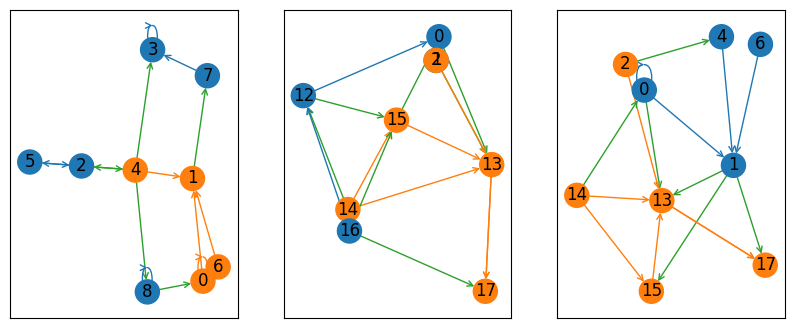

In [18]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 4))
pos_1 = nx.kamada_kawai_layout(graph_1)
pos_2 = nx.kamada_kawai_layout(graph_2)
plot_network_directed_cut(graph_1, first_subgraph, first_cut_wires, pos_1, axs[0])
plot_network_directed_cut(graph_2, second_subgraph, second_cut_wires, pos_2, axs[1])
plot_crossover_org(total_graph, first_subgraph, cut_graph_1.edges, cut_graph_2.edges, pos_t, axs[2])